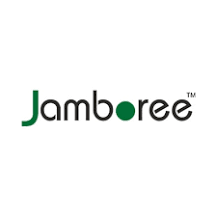

## About Jamboree

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their website and check their probablity of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

## Business Problem

Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

## Importing the libraries

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from scipy import stats
import warnings
warnings.simplefilter('ignore')

## Reading the dataset

In [80]:
df = pd.read_csv('Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## About the dataset

In [81]:
df.shape

(500, 9)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


The dataset has 500 rows and 9 columns.

### About the columns:

- Serial No : Unique row ID
- GRE Scores : Out of 340
- TOEFL Scores : Out of 120
- University Rating : Out of 5
- SOP : Statement of Purpose (out of 5)
- LOR : Letter of Recommendation Strength (out of 5)
- CGPA : Undergraduate GPA (out of 10)
- Reseach : Research Experience(either 0 or 1)
- Chance of Admit : ranging from 0 to 1

## Finding missing values in each columns

In [83]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

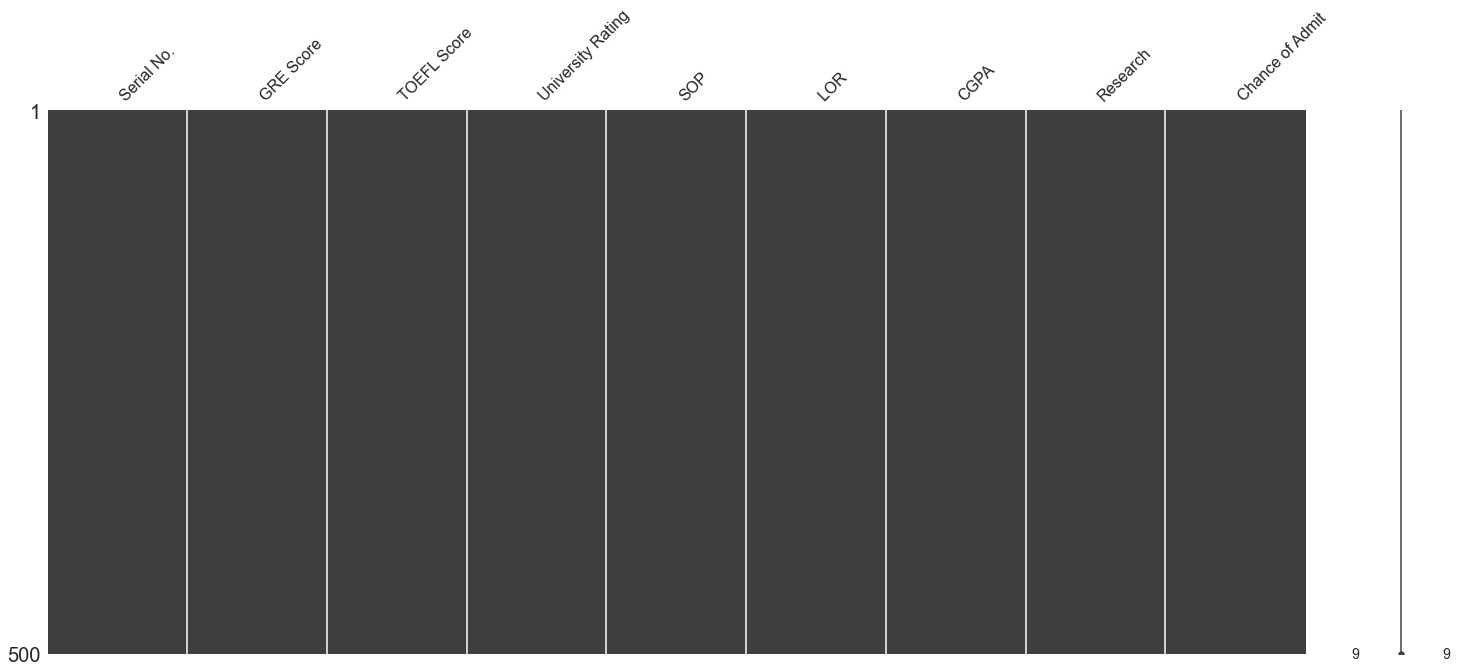

In [84]:
msno.matrix(df)
plt.show()

## Observations

- There are no missing values in the given dataset.

## Checking all rows of Serial No are unique

In [85]:
df['Serial No.'].nunique()

500

In [86]:
df.loc[df['Serial No.'].duplicated(),'Serial No.']

Series([], Name: Serial No., dtype: int64)

## Observations:
- There are no duplicate serail numbers.

## Descriptive Analysis

In [87]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## Observations:
- Average and median of GRE Score are very close.
- Average and median of TOEFL Score are very close.
- Average University Rating is 3.114
- Average SOP and LOP strength is 3.374 and 3.48 respectively
- Average CGPA of students is 8.57644
- Average Chance of Admit is 72.174

## Outlier Detection and Univariate Analysis

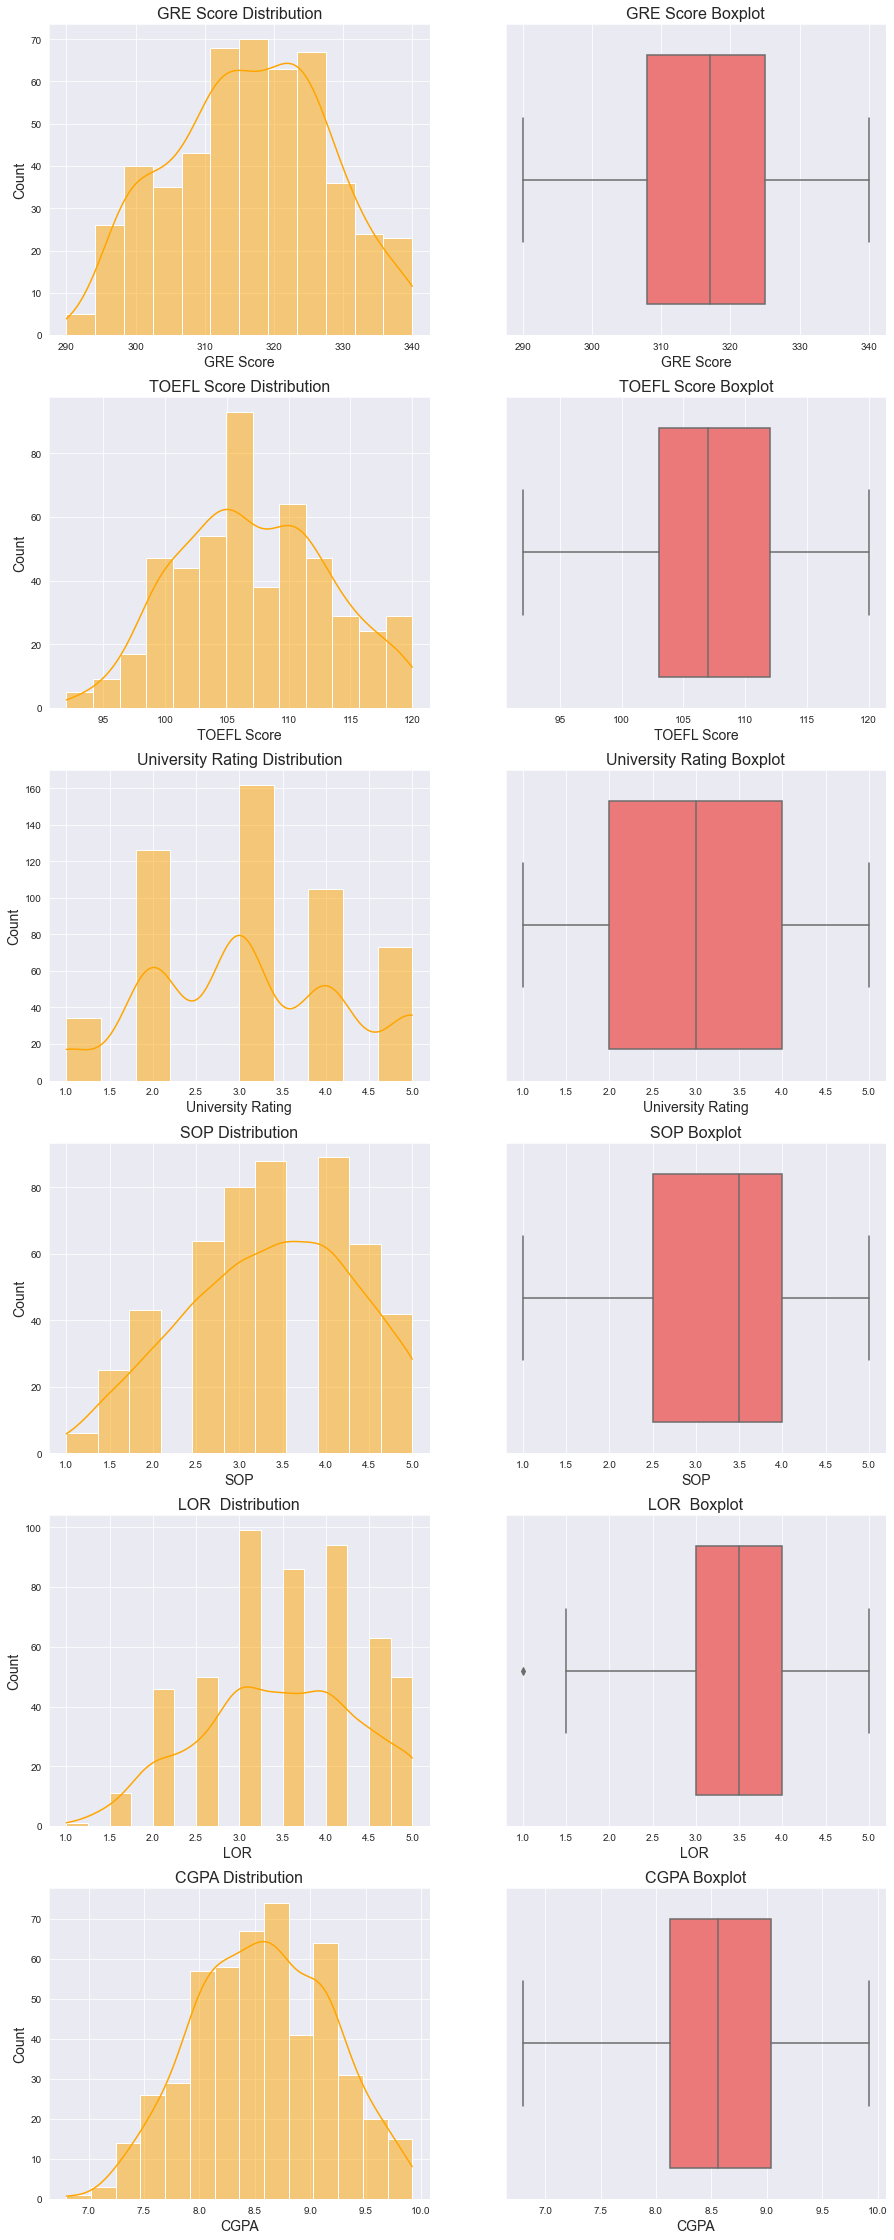

In [88]:
cols = ['GRE Score','TOEFL Score','University Rating',
        'SOP','LOR ','CGPA']
plt.figure(figsize = (15,40))
sns.set_style('darkgrid')
for i in range(len(cols)):
    plt.subplot(6,2,((2*i)+1))
    sns.histplot(data = df,x = cols[i],kde = True,color = 'orange')
    plt.xlabel(cols[i],fontsize = 14)
    plt.ylabel('Count',fontsize = 14)
    plt.title(f'{cols[i]} Distribution',fontsize = 16)
    
    plt.subplot(6,2,((2*i)+2))
    sns.boxplot(data = df,x = cols[i],color ='#ff6666' )
    plt.xlabel(cols[i],fontsize = 14)
    plt.title(f'{cols[i]} Boxplot',fontsize = 16)
plt.show()

## Observations
- It is observed that there are no outliers
- It is observed that only University rating has a normal distribution 

## Research Experience

In [89]:
df['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

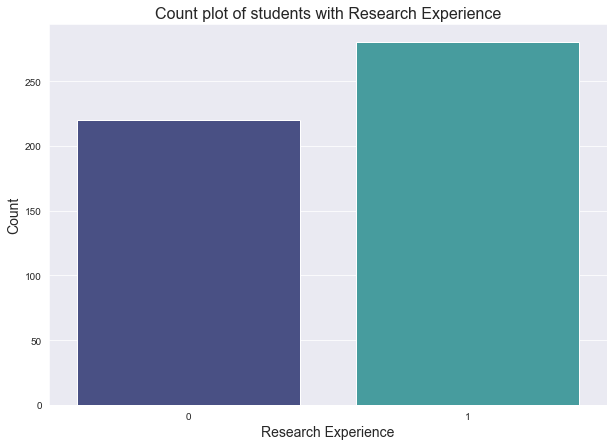

In [90]:
plt.figure(figsize = (10,7))
sns.countplot(x = df['Research'],data = df,palette = 'mako')
plt.title('Count plot of students with Research Experience',
          fontsize = 16)
plt.xlabel('Research Experience',fontsize = 14)
plt.ylabel('Count',fontsize = 14)
plt.show()

## Observation:
- Majority of the students have Research experience

## Bivariate Analysis

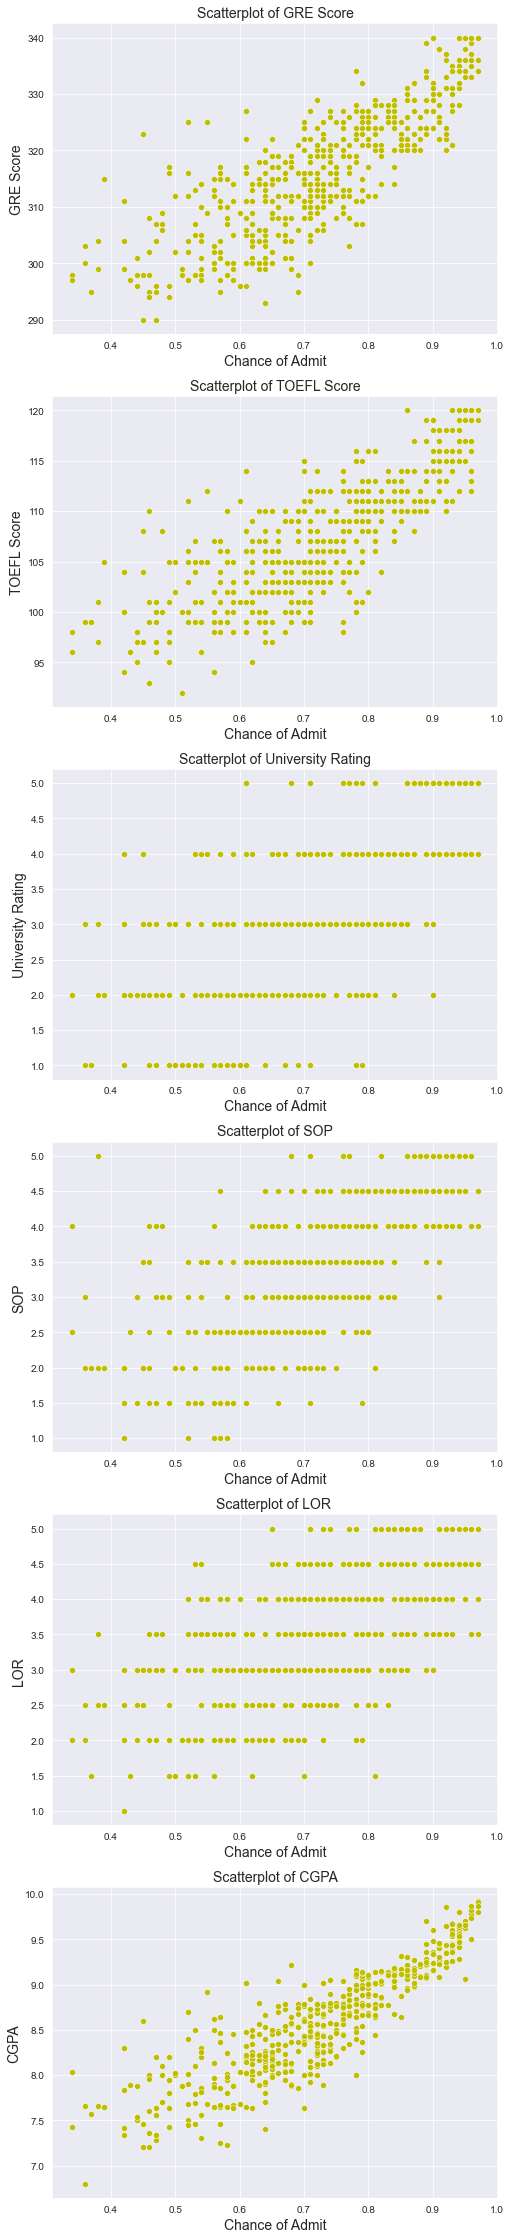

In [91]:
plt.figure(figsize = (8,40))
for i in range(len(cols)):
    plt.subplot(6,1,i+1)
    sns.scatterplot(x='Chance of Admit ',data=df,y=cols[i],color = 'y')
    plt.title(f'Scatterplot of {cols[i]}',fontsize = 14)
    plt.ylabel(cols[i],fontsize = 14)
    plt.xlabel('Chance of Admit',fontsize = 14)
plt.show()

## Observations:
- As the CGPA increases the Chance of Admit also increases.
- As the GRE Score increases the Chance of Admit also increases.
- As the TOEFL Score increases the Chance of Admit also increases.

In [92]:
a = df[['Research','Chance of Admit ']]
a.loc[a['Research']==1,'Research']='Y'
a.loc[a['Research']==0,'Research']='N'
a

,Research,Chance of Admit
0,Y,0.92
1,Y,0.76
2,Y,0.72
3,Y,0.80
4,N,0.65
...,...,...
495,Y,0.87
496,Y,0.96
497,Y,0.93
498,N,0.73


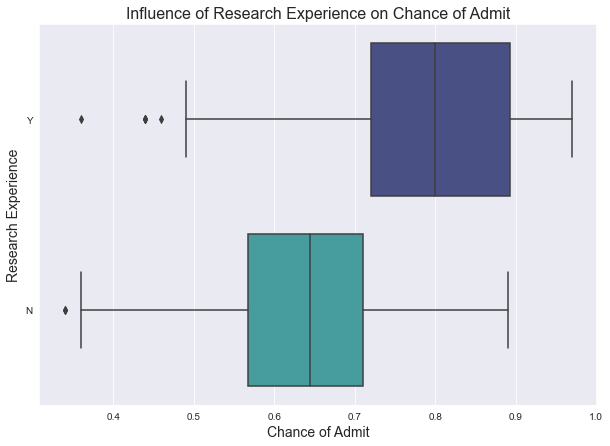

In [93]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Chance of Admit ',y='Research',data = a,palette = 'mako')
plt.title('Influence of Research Experience on Chance of Admit',fontsize = 16)
plt.xlabel('Chance of Admit',fontsize = 14)
plt.ylabel('Research Experience',fontsize = 14)
plt.show()

## Observations:
- It is observed that students with a research experience have a greater median chance of admit than students with no research background. 

## Multivariate Analysis

In [94]:
a = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Research','Chance of Admit ']]
a.loc[a['Research']==1,'Research']='Y'
a.loc[a['Research']==0,'Research']='N'
a

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,Y,0.92
1,324,107,4,4.0,4.5,8.87,Y,0.76
2,316,104,3,3.0,3.5,8.00,Y,0.72
3,322,110,3,3.5,2.5,8.67,Y,0.80
4,314,103,2,2.0,3.0,8.21,N,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,Y,0.87
496,337,117,5,5.0,5.0,9.87,Y,0.96
497,330,120,5,4.5,5.0,9.56,Y,0.93
498,312,103,4,4.0,5.0,8.43,N,0.73


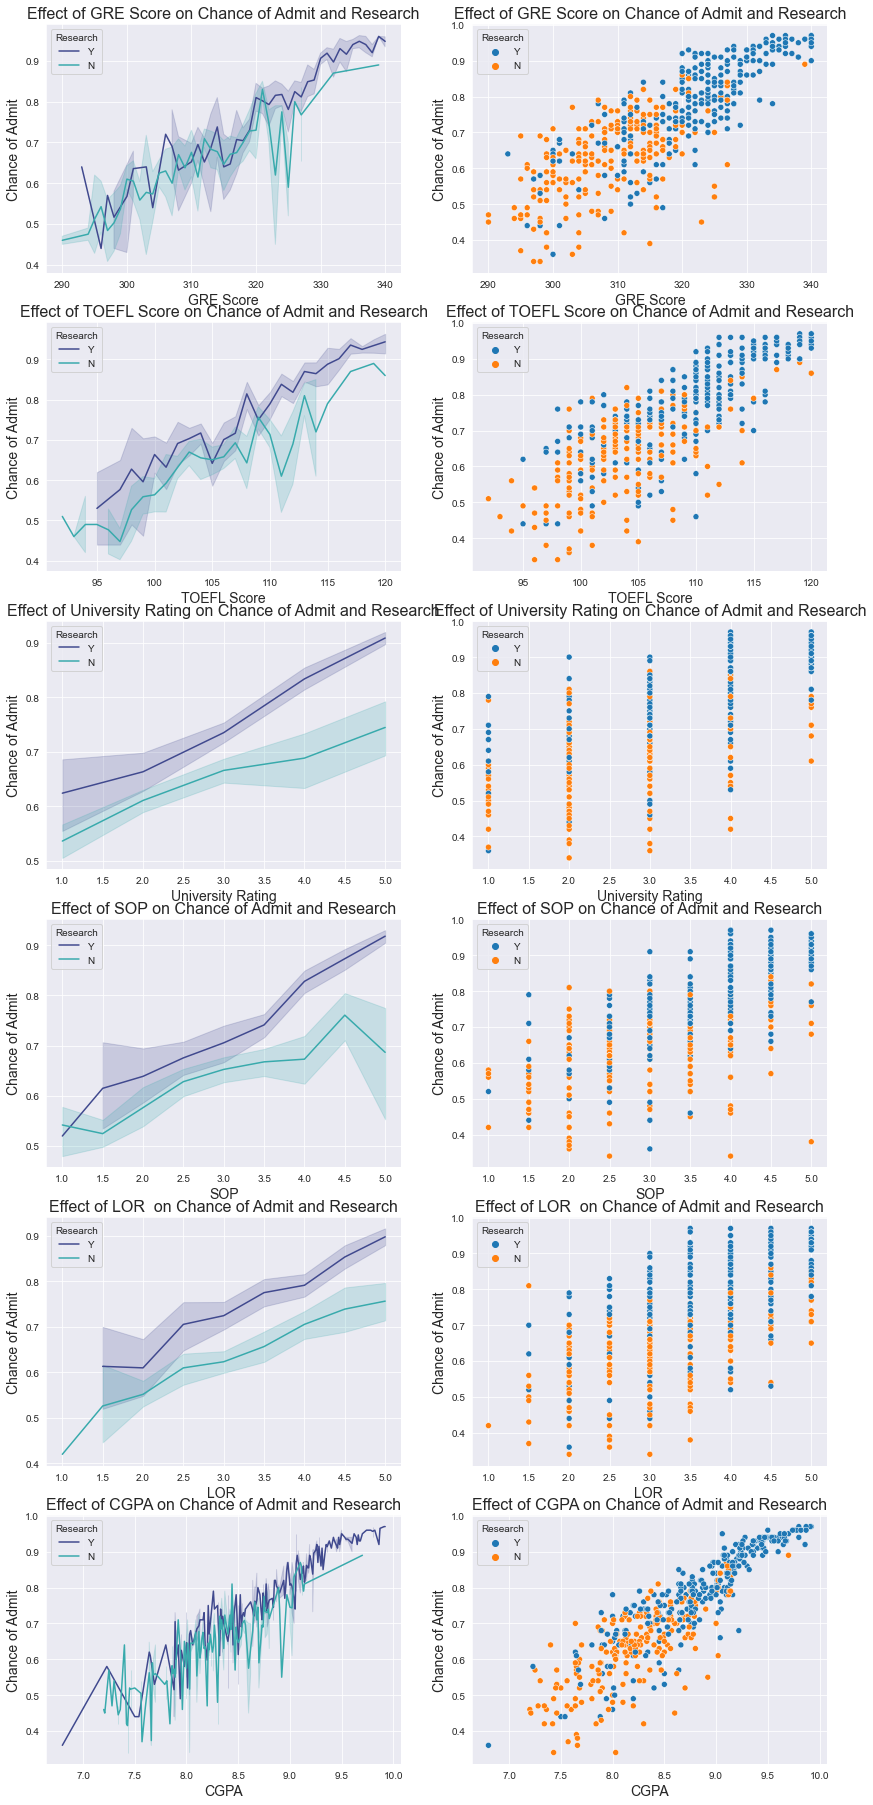

In [95]:
plt.figure(figsize = (14,32))
for i in range(len(cols)):
    plt.subplot(6,2,(2*i)+1)
    sns.lineplot(data = a,x=cols[i],y='Chance of Admit ',hue = 'Research',palette = 'mako')
    plt.xlabel(cols[i],fontsize = 14)
    plt.ylabel('Chance of Admit',fontsize = 14)
    plt.title(f'Effect of {cols[i]} on Chance of Admit and Research',
             fontsize = 16)
    
    plt.subplot(6,2,(2*i)+2)
    sns.scatterplot(data=a,x=cols[i],y='Chance of Admit ',hue = 'Research')
    plt.xlabel(cols[i],fontsize = 14)
    plt.ylabel('Chance of Admit',fontsize = 14)
    plt.title(f'Effect of {cols[i]} on Chance of Admit and Research',fontsize = 16)
plt.show()

## Observations

- Students with research experience have higher chance of getting admited with good LOR,SOP strengths and University ratings.


## Correlation Test

<AxesSubplot:>

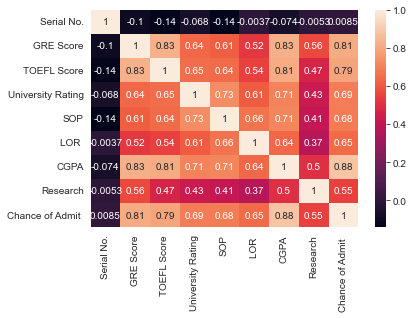

In [96]:
sns.heatmap(df.corr(),annot = True)

## Observations
- GRE Score, TOEFL Score and CGPA have strong correlation with Chance of Admit feature.

## Scaling the dataset using MinMaxScaler
Scaling the dataset because the weights needs to be balanced and not biased , weights with high magnitude can create to bias.

In [97]:
x = df.drop(columns = ['Serial No.'],axis = 1)

In [98]:
x.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [99]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns = x.columns)
y = x['Chance of Admit '].values.reshape(-1,1)
X=x.drop(columns = ['Chance of Admit '],axis = 1)
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152


## Splitting the Data for Training ,Testing and Validating

In [100]:
X_tr_cv,X_test,y_tr_cv,y_test = train_test_split(X,y,
                                                 test_size = 0.15,
                                                 random_state = 1)
X_train,X_val,y_train,y_val = train_test_split(X_tr_cv,y_tr_cv,
                                              test_size = 0.2,
                                               random_state = 1)

In [101]:
print('Shape of training data: ',X_train.shape)
print('Shape of testing data: ',X_test.shape)
print('Shape of cross-validation data: ',X_val.shape)

Shape of training data:  (340, 7)
Shape of testing data:  (75, 7)
Shape of cross-validation data:  (85, 7)


## Model Building
Building the linear regression model

In [102]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

## Coefficients along with the column names

In [103]:
coeff = pd.DataFrame(lr_model.coef_,columns = X_train.columns.values)

In [104]:
coeff

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.182354,0.115298,0.052521,0.007835,0.08446,0.511442,0.076315


In [105]:
lr_model.intercept_

array([-0.00415281])

## Adjusted R2 score

In [106]:
def adj_r2(X,y,r2_score):
    return 1-((1-r2_score)*(X.shape[0]-1)/(X.shape[0]-X.shape[1]-1))

## Model Performance Metrics

In [107]:
y_hat = lr_model.predict(X_test) 
print('MSE: ',mean_squared_error(y_test,y_hat))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_hat)))
print('MAE: ',mean_absolute_error(y_test,y_hat))
print('R2 Score: ',r2_score(y_test,y_hat))
print('Adjusted R2 score: ',adj_r2(y_test,y_hat,r2_score(y_test,y_hat)))

MSE:  0.17336344129555933
RMSE:  0.41636935681622794
MAE:  0.28250379706049167
R2 Score:  0.8045487718346362
Adjusted R2 score:  0.8018713577501793


## Testing the assumptions of Linear Regression 

### 1. Linearity: The relationship between the dependent and independent variables is linear.

<AxesSubplot:>

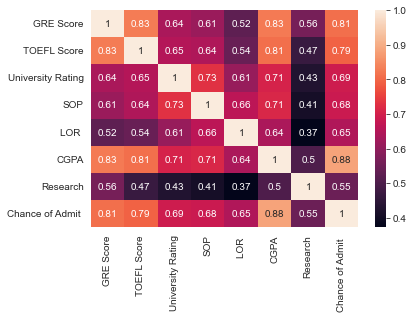

In [108]:
sns.heatmap(x.corr(),annot = True)

## Observations:
- All the features have a positive linear correlation with Chance of Admit feature. Therefore signifying a linear relationship with the Chance of Admit feature.

### 2. No Multi-colinearity: The independent variables are not highly correlated with each other.

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
5,CGPA,4.78
0,GRE Score,4.46
1,TOEFL Score,3.90
3,SOP,2.84
2,University Rating,2.62
4,LOR,2.03
6,Research,1.49


## Observatrion:
- With all VIF Scores below 5, there\'s very little indication of multi-colinearity.

### 3. Normality : The residuals should be normally distributed.

In [110]:
y_hat = lr_model.predict(X_test)
residuals = y_test - y_hat
print('Mean of Residuals : ', np.mean(residuals))

Mean of Residuals :  -0.03355155063641812


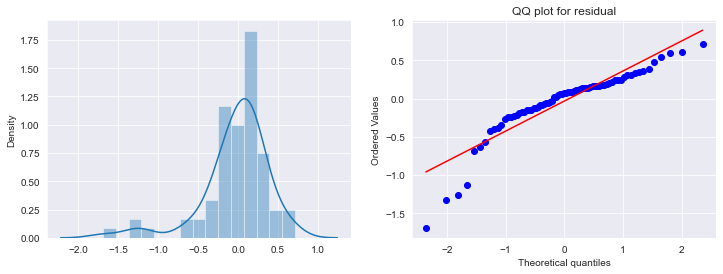

In [111]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.distplot(residuals)

plt.subplot(1,2,2)
stats.probplot(residuals.reshape(-1),plot = plt)
plt.title("QQ plot for residual")
plt.show()

## Observation
- The residuals does follow a normal distribution.

### 4. No Heteroscedasticity: The variance of errors is constant across all levels of independent variables.

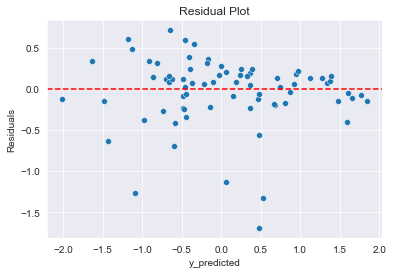

In [112]:
sns.scatterplot(x = y_hat.reshape((-1,)),y = residuals.reshape((-1,)))
plt.title('Residual Plot')
plt.xlabel('y_predicted')
plt.ylabel('Residuals')
plt.axhline(y= 0,color = 'r',linestyle = '--')
plt.show()

## Observation:
- Since the residual plot shows no clear pattern or trend, we can conclude that there is no heteroscedasticity.

### 5. No auto correlation
There is no auto correlation because the data given to us not time series dependent.

## Ridge regression
- First we will build models with different values of lambda and measure the performance
- After that we select the value of lambda that has the highest performance

In [113]:
rate_list = [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]

train_scores = []
val_scores = []
for rate in rate_list:
    ridge_reg = Ridge(alpha = rate)
    ridge_reg.fit(X_train,y_train)
    train_score = adj_r2(X_train,y_train,ridge_reg.score(X_train,y_train))
    val_score = adj_r2(X_val,y_val,ridge_reg.score(X_val,y_val))
    train_scores.append(train_score)
    val_scores.append(val_score)

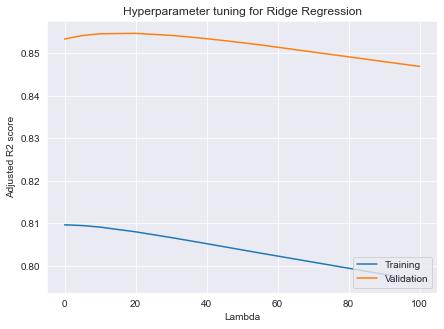

In [114]:
plt.figure(figsize = (7,5))
plt.plot(rate_list,train_scores,label = 'Training')
plt.plot(rate_list,val_scores,label = 'Validation')
plt.legend(loc = 'lower right')
plt.xlabel('Lambda')
plt.ylabel('Adjusted R2 score')
plt.title('Hyperparameter tuning for Ridge Regression')
plt.show()

In [115]:
np.argmax(val_scores)

8

## Observations
- The adjusted r2 score is max for lambda value 20

### For lambda 20 we will train the model and evaluate the performance.

In [116]:
rr_model = Ridge(alpha = 20)
rr_model.fit(X_train,y_train)

Ridge(alpha=20)

In [117]:
y_rr = rr_model.predict(X_test)

## Evaluation Metrics of Ridge Regression

In [118]:
print('MSE: ',mean_squared_error(y_test,y_rr))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_rr)))
print('MAE: ',mean_absolute_error(y_test,y_rr))
print('R2 Score: ',r2_score(y_test,y_rr))
print('Adjusted R2 score: ',adj_r2(y_test,y_rr,r2_score(y_test,y_rr)))

MSE:  0.17473772038889285
RMSE:  0.41801641162625763
MAE:  0.2862632785948892
R2 Score:  0.8029993994027861
Adjusted R2 score:  0.8003007610384407


## Lasso Regression

In [119]:
train_scores = []
val_scores = []
for rate in rate_list:
    l_reg = Lasso(alpha = rate)
    l_reg.fit(X_train,y_train)
    train_score = adj_r2(X_train,y_train,l_reg.score(X_train,y_train))
    val_score = adj_r2(X_val,y_val,l_reg.score(X_val,y_val))
    train_scores.append(train_score)
    val_scores.append(val_score)

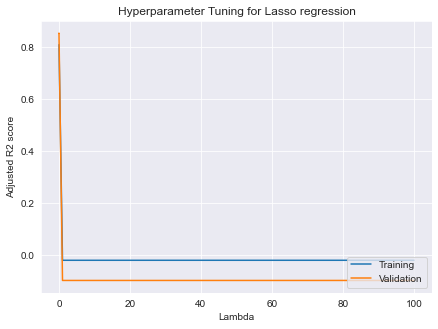

In [120]:
plt.figure(figsize = (7,5))
plt.plot(rate_list,train_scores,label = 'Training')
plt.plot(rate_list,val_scores,label = 'Validation')
plt.legend(loc = 'lower right')
plt.xlabel('Lambda')
plt.ylabel('Adjusted R2 score')
plt.title('Hyperparameter Tuning for Lasso regression')
plt.show()

In [121]:
np.argmax(val_scores)

2

In [122]:
rate_list[2]

1e-08

## Observation 
- For lambda value of 1e-08 the adjusted r2 score is maximum

### For lambda 1e-08 we will train the model and evaluate the performance.

In [123]:
lsr_model = Lasso(alpha = 1e-08)
lsr_model.fit(X_train,y_train)

Lasso(alpha=1e-08)

In [124]:
y_lsr = lsr_model.predict(X_test)

## Evaluation Metrics for Lasso Regression

In [125]:
print('MSE: ',mean_squared_error(y_test,y_lsr))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_lsr)))
print('MAE: ',mean_absolute_error(y_test,y_lsr))
print('R2 Score: ',r2_score(y_test,y_lsr))
print('Adjusted R2 score: ',adj_r2(y_test,y_lsr,r2_score(y_test,y_lsr)))

MSE:  0.17336344322735356
RMSE:  0.4163693591360363
MAE:  0.2825037988165353
R2 Score:  0.8045487696567172
Adjusted R2 score:  0.8018713555424256


## Elastic Net Regression

In [126]:
train_scores = []
val_scores = []
for rate in rate_list:
    e_reg = ElasticNet(alpha = rate)
    e_reg.fit(X_train,y_train)
    train_score = adj_r2(X_train,y_train,e_reg.score(X_train,y_train))
    val_score = adj_r2(X_val,y_val,e_reg.score(X_val,y_val))
    train_scores.append(train_score)
    val_scores.append(val_score)

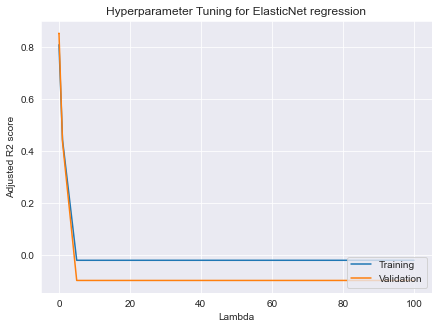

In [127]:
plt.figure(figsize = (7,5))
plt.plot(rate_list,train_scores,label = 'Training')
plt.plot(rate_list,val_scores,label = 'Validation')
plt.legend(loc = 'lower right')
plt.xlabel('Lambda')
plt.ylabel('Adjusted R2 score')
plt.title('Hyperparameter Tuning for ElasticNet regression')
plt.show()

In [128]:
np.argmax(val_score)

0

In [129]:
rate_list[0]

1e-15

## Observation:
- For lambda value of 1e-15 the adjusted r2 score was maximum.

### For lambda 1e-15 we will train the model and evaluate the performance.

In [130]:
el_model = ElasticNet(alpha = 1e-15)
el_model.fit(X_train,y_train)

ElasticNet(alpha=1e-15)

In [131]:
y_el = el_model.predict(X_test)

In [132]:
print('MSE: ',mean_squared_error(y_test,y_el))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_el)))
print('MAE: ',mean_absolute_error(y_test,y_el))
print('R2 Score: ',r2_score(y_test,y_el))
print('Adjusted R2 score: ',adj_r2(y_test,y_el,r2_score(y_test,y_el)))

MSE:  0.1733634412955593
RMSE:  0.4163693568162279
MAE:  0.28250379706049156
R2 Score:  0.8045487718346364
Adjusted R2 score:  0.8018713577501793


## Observation
According to the adjusted r2 score the best performance was with Elastic Net regression model.

## Actionable Insights 

- As the CGPA increases the Chance of Admit also increases.
- As the GRE Score increases the Chance of Admit also increases.
- As the TOEFL Score increases the Chance of Admit also increases.
- It is observed that students with a research experience have a greater
median chance of admit than students with no research background.
- Students with research experience have higher chance of getting
admited with good LOR,SOP strengths and University ratings.
- GRE Score, TOEFL Score and CGPA have strong
correlation with Chance of Admit feature.

## Recommendations

- Because of the strong correlation between GRE Score, TOEFL Score and CGPA 
additional independent features are required to enhace the accuaracy of the model.
- Students with research experience have better LOR,SOP scores and University rankings, so more awareness of research should be organized.
- Students should be advised to have better CGPA as CGPA has a strong correlation with the chance of getting admitted.
